In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip  /content/gdrive/My\Drive/'MAMI DATASET'/training.zip

Streaming output truncated to the last 5000 lines.
  inflating: TRAINING/4665.jpg       
  inflating: TRAINING/4666.jpg       
  inflating: TRAINING/4667.jpg       
  inflating: TRAINING/4669.jpg       
  inflating: TRAINING/467.jpg        
  inflating: TRAINING/4670.jpg       
  inflating: TRAINING/4671.jpg       
  inflating: TRAINING/4673.jpg       
  inflating: TRAINING/4674.jpg       
  inflating: TRAINING/4675.jpg       
  inflating: TRAINING/4678.jpg       
  inflating: TRAINING/4679.jpg       
  inflating: TRAINING/468.jpg        
  inflating: TRAINING/4680.jpg       
  inflating: TRAINING/4681.jpg       
  inflating: TRAINING/4682.jpg       
  inflating: TRAINING/4683.jpg       
  inflating: TRAINING/4685.jpg       
  inflating: TRAINING/4686.jpg       
  inflating: TRAINING/4687.jpg       
  inflating: TRAINING/4688.jpg       
  inflating: TRAINING/4689.jpg       
  inflating: TRAINING/469.jpg        
  inflating: TRAINING/4690.jpg       
  inflating: TRAINING/4691.jpg       

In [ ]:
!unzip -P *MaMiSemEval2022! gdrive/My\Drive/trial.zip


Archive:  gdrive/MyDrive/trial.zip
replace Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/162.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/162.jpg  
  inflating: Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/1384.jpg  
  inflating: Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/980.jpg  
  inflating: Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/981.jpg  
  inflating: Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/349.jpg  
  inflating: Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/89.jpg  
  inflating: Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/822.jpg  
  inflating: Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/1408.jpg  
  inflating: Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/175.jpg  
  inflating: Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/161.jpg  
  inflating: Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/1146.jpg  
  inf

In [ ]:
!unzip -P *MaMiSemEval2022! gdrive/My\Drive/test.zip

Archive:  gdrive/MyDrive/test.zip
replace test/15001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test/15001.jpg          
 extracting: test/15002.jpg          
  inflating: test/15004.jpg          
  inflating: test/15005.jpg          
 extracting: test/15006.jpg          
  inflating: test/15008.jpg          
  inflating: test/15009.jpg          
  inflating: test/15010.jpg          
  inflating: test/15011.jpg          
 extracting: test/15012.jpg          
  inflating: test/15014.jpg          
  inflating: test/15016.jpg          
 extracting: test/15017.jpg          
 extracting: test/15018.jpg          
 extracting: test/15019.jpg          
  inflating: test/15020.jpg          
 extracting: test/15021.jpg          
 extracting: test/15022.jpg          
 extracting: test/15024.jpg          
  inflating: test/15025.jpg          
 extracting: test/15026.jpg          
  inflating: test/15027.jpg          
  inflating: test/15031.jpg          
  inflating: test/15033.jpg 

In [ ]:
!ls /content/TRAINING/training.csv

/content/TRAINING/training.csv


In [ ]:
!ls /content/test/Test.csv

/content/test/Test.csv


In [ ]:
!ls /content/Users/fersiniel/Desktop/'MAMI - TO LABEL'/'TRIAL DATASET'/trial.csv

'/content/Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/trial.csv'


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM,SimpleRNN,GRU
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import nltk
#nltk.download('omw-1.4')
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from keras.layers import Dropout
import matplotlib.pyplot as plt



In [ ]:
data1=pd.read_csv('/content/TRAINING/training.csv', sep='\t')
data2=pd.read_csv('/content/test/Test.csv', sep='\t')
y=data1['misogynous']
# print(training_data.head())
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words=stopwords.words('english')
stop_words.append('imgflipcom')
stop_words.append('zip')
print(stop_words)
lemmatizer=WordNetLemmatizer()
#training data
for index,row in data1.iterrows():
  #print(row)
  filter_sentence=[]
  sentence=row['Text Transcription']
  sentence = sentence.lower()
  #print(sentence)
  sentence=re.sub(r'[^\w\s]','',sentence)#cleaning
  words=nltk.word_tokenize(sentence)
  words=[w for w in words if not w in stop_words]
  for word in words:
    filter_sentence.append(lemmatizer.lemmatize(word))
  #print(filter_sentence)
  listToStr = ' '.join([str(elem) for elem in filter_sentence])
  data1.loc[index,"Text Transcription"]=listToStr
#trail data
for index,row in data2.iterrows():
  #print(row)
    filter_sentence=[]
    sentence=row['Text Transcription']
    sentence = sentence.lower()
    #print(sentence)
    sentence=re.sub(r'[^\w\s]','',sentence)#cleaning
    words=nltk.word_tokenize(sentence)
    words=[w for w in words if not w in stop_words]
    for word in words:
        filter_sentence.append(lemmatizer.lemmatize(word))
    #print(filter_sentence)
    listToStr = ' '.join([str(elem) for elem in filter_sentence])
    data2.loc[index,"Text Transcription"]=listToStr

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")

In [ ]:
def get_max_length(df):
    
#get max token counts from train data, so we use this number as fixed length input to LSTM cell
    
    max_length = 0
    for row in df['Text Transcription']:
        if len(row.split(" ")) > max_length:
            max_length = len(row.split(" "))
    return max_length

def word2vec(reviews):
#get word2vec value for each word in sentence.concatenate word in numpy array, so we can use it as LSTM input
    encoded_reviews = []
    for review in reviews:
        tokens = review.split(" ")
        word2vec_embedding = embed(tokens)
        encoded_reviews.append(word2vec_embedding)
    return encoded_reviews
        
def padded_encoded(encoded_reviews):
#for short sentences, we prepend zero padding so all input to LSTM has same length
    padded_reviews_encoding = []
    for enc_review in encoded_reviews:
        zero_padding_cnt = max_length - enc_review.shape[0]
        pad = np.zeros((1, 250))
        for i in range(zero_padding_cnt):
            enc_review = np.concatenate((pad, enc_review), axis=0)
        padded_reviews_encoding.append(enc_review)
    return padded_reviews_encoding

def sentiment_encode(sentiment):
#return one hot encoding for Y value
    if sentiment == 1:
        return [1,0]
    else:
        return [0,1]
    
def preprocess(df):
#encode text value to numeric value
# encode words into word2vec
    reviews = df['Text Transcription'].tolist()
    
    encoded_reviews = word2vec(reviews)
    padded_encoded_reviews = padded_encoded(encoded_reviews)
    # encoded sentiment
    sentiments = df['misogynous'].tolist()
    encoded_sentiment = [sentiment_encode(sentiment) for sentiment in sentiments]
    X = np.array(padded_encoded_reviews)
    Y = np.array(encoded_sentiment)
    return X, Y 

In [ ]:
max_length = get_max_length(data1)

train_X, train_Y = preprocess(data1)

In [ ]:
model=Sequential()
model.add((LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
model.fit(train_X,train_Y,validation_split=0.2,epochs=30,batch_size=100)

Epoch 1/30
80/80 [==============================] - 29s 330ms/step - loss: 0.6658 - accuracy: 0.6034 - val_loss: 0.6535 - val_accuracy: 0.6215
Epoch 2/30
80/80 [==============================] - 23s 294ms/step - loss: 0.6185 - accuracy: 0.6640 - val_loss: 0.6239 - val_accuracy: 0.6635
Epoch 3/30
80/80 [==============================] - 23s 294ms/step - loss: 0.5940 - accuracy: 0.6851 - val_loss: 0.6041 - val_accuracy: 0.6625
Epoch 4/30
80/80 [==============================] - 25s 308ms/step - loss: 0.5777 - accuracy: 0.6952 - val_loss: 0.6020 - val_accuracy: 0.6830
Epoch 5/30
80/80 [==============================] - 24s 296ms/step - loss: 0.5648 - accuracy: 0.7071 - val_loss: 0.5900 - val_accuracy: 0.6885
Epoch 6/30
80/80 [==============================] - 23s 294ms/step - loss: 0.5485 - accuracy: 0.7220 - val_loss: 0.5892 - val_accuracy: 0.6850
Epoch 7/30
80/80 [==============================] - 25s 309ms/step - loss: 0.5420 - accuracy: 0.7284 - val_loss: 0.5798 - val_accuracy: 0.6975

In [ ]:
def get_max_length(df):
    
#get max token counts from train data, so we use this number as fixed length input to LSTM cell
    
    max_length = 0
    for row in df['Text Transcription']:
        if len(row.split(" ")) > max_length:
            max_length = len(row.split(" "))
    return max_length

def word2vec(reviews):
#get word2vec value for each word in sentence.concatenate word in numpy array, so we can use it as LSTM input
    encoded_reviews = []
    for review in reviews:
        tokens = review.split(" ")
        word2vec_embedding = embed(tokens)
        encoded_reviews.append(word2vec_embedding)
    return encoded_reviews
        
def padded_encoded(encoded_reviews):
#for short sentences, we prepend zero padding so all input to LSTM has same length
    padded_reviews_encoding = []
    for enc_review in encoded_reviews:
        zero_padding_cnt = max_length - enc_review.shape[0]
        pad = np.zeros((1, 250))
        for i in range(zero_padding_cnt):
            enc_review = np.concatenate((pad, enc_review), axis=0)
        padded_reviews_encoding.append(enc_review)
    return padded_reviews_encoding

def sentiment_encode(sentiment):
#return one hot encoding for Y value
    if sentiment == 1:
        return [1,0]
    else:
        return [0,1]
    
def preprocess2(df):
#encode text value to numeric value
# encode words into word2vec
    reviews = df['Text Transcription'].tolist()
    
    encoded_reviews = word2vec(reviews)
    padded_encoded_reviews = padded_encoded(encoded_reviews)
    # encoded sentiment
    #sentiments = df['misogynous'].tolist()
    #encoded_sentiment = [sentiment_encode(sentiment) for sentiment in sentiments]
    X = np.array(padded_encoded_reviews)
    #Y = np.array(encoded_sentiment)
    return X

In [ ]:
def predict_review(model, reviews,data2):
  # Create the sequences
  classes = model.predict(reviews)
  pred_classes = [np.argmax(i) for i in classes]
  classes_prob = model.predict(reviews)
  for x in range(len(reviews)):
    print(data2['Text Transcription'].iloc[x]," - ", ([pred_classes[x]])[0])
    print(classes_prob[x])
    print('\n')
reviews=preprocess2(data2)
predict_review(model,reviews,data2)

facebook single group belike new woman join group  -  0
[0.8327589  0.16374141]


youre feminist eat dairy  -  0
[0.97653306 0.02220738]


cute girl left message seen  -  0
[0.9158516  0.07811534]


photographing something want show everyone object male woman female  -  0
[0.6371247  0.38602048]


hey babe make sandwich hey babe make sandwich bought boat  -  0
[0.99504817 0.00463516]


25 quick 5 mile run 35 buckling kid car seat  -  0
[0.7941873  0.20753029]


extreme rape woman picture going get hard diydespaircom  -  0
[0.9795879  0.01954901]


ur mom say shouldnt waste day watching netflix  -  1
[0.17711034 0.8253875 ]


woman woman woman 0 respect  -  0
[0.82322496 0.17163655]


rape know asked  -  0
[0.86928374 0.12008911]


computer 20 virus 40 hot milfs area  -  1
[0.09073681 0.9068767 ]


got ta big fat as couple std trusiongcar  -  0
[0.92174864 0.07488593]


dont always steal wife rie make sex slave makooremsca  -  0
[0.82082605 0.18047595]


bought new guitar said going sel

In [ ]:
data3=pd.read_csv("/content/Users/fersiniel/Desktop/MAMI - TO LABEL/TRIAL DATASET/trial.csv",sep='\t')

In [ ]:
test_X, test_Y = preprocess(data3)
Y_true=data3['misogynous']

In [ ]:
predict_x=model.predict(test_X) 
y_pred=np.argmax(predict_x,axis=1)

In [ ]:
score, acc = model.evaluate(test_X, test_Y, verbose=2)
print('Test score:', score)
print('Test accuracy:', acc)

4/4 - 1s - loss: 0.5695 - accuracy: 0.7000 - 618ms/epoch - 154ms/step
Test score: 0.5695068836212158
Test accuracy: 0.699999988079071


In [ ]:
from sklearn.metrics import classification_report
target_names=['class 10',"class 01"]
print(classification_report(Y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    class 10       0.68      0.46      0.55        56
    class 01       0.52      0.73      0.60        44

    accuracy                           0.58       100
   macro avg       0.60      0.60      0.58       100
weighted avg       0.61      0.58      0.58       100



In [ ]:
model_RNN=Sequential()
model_RNN.add(SimpleRNN((64)))
model_RNN.add(Dropout(0.3))
model_RNN.add(Dense(2,activation='sigmoid'))
model_RNN.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])


history=model_RNN.fit(train_X,train_Y,validation_split=0.2,epochs=20,batch_size=100)


Epoch 1/20
80/80 [==============================] - 9s 104ms/step - loss: 0.6728 - accuracy: 0.5909 - val_loss: 0.6503 - val_accuracy: 0.6345
Epoch 2/20
80/80 [==============================] - 8s 97ms/step - loss: 0.6312 - accuracy: 0.6559 - val_loss: 0.6212 - val_accuracy: 0.6565
Epoch 3/20
80/80 [==============================] - 8s 98ms/step - loss: 0.5967 - accuracy: 0.6870 - val_loss: 0.6109 - val_accuracy: 0.6650
Epoch 4/20
80/80 [==============================] - 8s 98ms/step - loss: 0.5953 - accuracy: 0.6874 - val_loss: 0.6296 - val_accuracy: 0.6675
Epoch 5/20
80/80 [==============================] - 8s 97ms/step - loss: 0.5778 - accuracy: 0.7075 - val_loss: 0.6138 - val_accuracy: 0.6745
Epoch 6/20
80/80 [==============================] - 8s 98ms/step - loss: 0.5601 - accuracy: 0.7169 - val_loss: 0.6107 - val_accuracy: 0.6720
Epoch 7/20
80/80 [==============================] - 8s 98ms/step - loss: 0.5595 - accuracy: 0.7145 - val_loss: 0.7108 - val_accuracy: 0.5535
Epoch 8/20
8

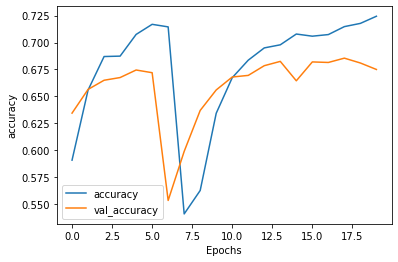

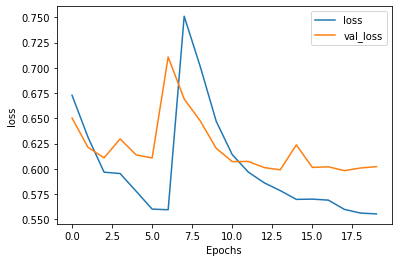

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
predict_review(model_RNN,reviews,data2)

facebook single group belike new woman join group  -  0
[0.73476475 0.25495   ]


youre feminist eat dairy  -  0
[0.72433    0.27959853]


cute girl left message seen  -  0
[0.6667375  0.32989323]


photographing something want show everyone object male woman female  -  0
[0.83476955 0.17817134]


hey babe make sandwich hey babe make sandwich bought boat  -  0
[0.9088908  0.08212849]


25 quick 5 mile run 35 buckling kid car seat  -  0
[0.8194462  0.17704412]


extreme rape woman picture going get hard diydespaircom  -  0
[0.9438461  0.05522147]


ur mom say shouldnt waste day watching netflix  -  1
[0.21171746 0.75823   ]


woman woman woman 0 respect  -  0
[0.946241   0.05573002]


rape know asked  -  0
[0.66284436 0.3270377 ]


computer 20 virus 40 hot milfs area  -  1
[0.21952781 0.76899874]


got ta big fat as couple std trusiongcar  -  0
[0.7380334 0.2615573]


dont always steal wife rie make sex slave makooremsca  -  0
[0.7831731  0.21812132]


bought new guitar said going sell 

In [ ]:
predict_x=model_RNN.predict(test_X) 
y_pred=np.argmax(predict_x,axis=1)

In [ ]:
Y_true=data3['misogynous']

In [ ]:
Y_true

0     0
1     0
2     0
3     1
4     0
     ..
95    1
96    0
97    1
98    0
99    0
Name: misogynous, Length: 100, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
target_names=['class 1',"class 0"]
print(classification_report(Y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

     class 1       0.45      0.57      0.50        56
     class 0       0.17      0.11      0.14        44

    accuracy                           0.37       100
   macro avg       0.31      0.34      0.32       100
weighted avg       0.33      0.37      0.34       100



In [ ]:
model_GRU=Sequential()
model_GRU.add(GRU((64)))
model_GRU.add(Dropout(0.3))
model_GRU.add(Dense(2,activation='sigmoid'))
model_GRU.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])


history=model_RNN.fit(train_X,train_Y,validation_split=0.2,epochs=20,batch_size=100)

Epoch 1/20
80/80 [==============================] - 9s 111ms/step - loss: 0.5483 - accuracy: 0.7247 - val_loss: 0.6017 - val_accuracy: 0.6775
Epoch 2/20
80/80 [==============================] - 8s 98ms/step - loss: 0.5473 - accuracy: 0.7255 - val_loss: 0.6036 - val_accuracy: 0.6885
Epoch 3/20
80/80 [==============================] - 8s 99ms/step - loss: 0.5432 - accuracy: 0.7296 - val_loss: 0.6005 - val_accuracy: 0.6890
Epoch 4/20
80/80 [==============================] - 8s 100ms/step - loss: 0.5358 - accuracy: 0.7361 - val_loss: 0.6003 - val_accuracy: 0.6850
Epoch 5/20
80/80 [==============================] - 8s 99ms/step - loss: 0.5320 - accuracy: 0.7376 - val_loss: 0.6037 - val_accuracy: 0.6815
Epoch 6/20
80/80 [==============================] - 8s 98ms/step - loss: 0.5299 - accuracy: 0.7390 - val_loss: 0.6056 - val_accuracy: 0.6830
Epoch 7/20
80/80 [==============================] - 8s 99ms/step - loss: 0.5230 - accuracy: 0.7441 - val_loss: 0.6085 - val_accuracy: 0.6785
Epoch 8/20


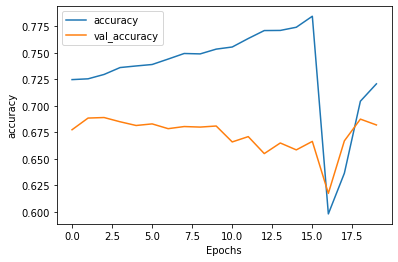

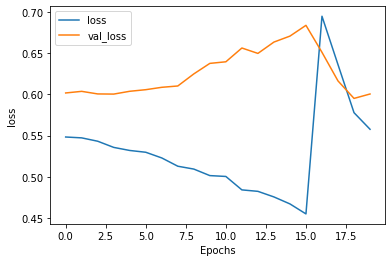

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
predict_review(model_GRU,reviews,data2)

facebook single group belike new woman join group  -  1
[0.48274252 0.52232915]


youre feminist eat dairy  -  1
[0.48550233 0.51513505]


cute girl left message seen  -  1
[0.4846101  0.49604547]


photographing something want show everyone object male woman female  -  1
[0.4614127  0.53070354]


hey babe make sandwich hey babe make sandwich bought boat  -  0
[0.48081383 0.46933496]


25 quick 5 mile run 35 buckling kid car seat  -  1
[0.47250125 0.47801328]


extreme rape woman picture going get hard diydespaircom  -  1
[0.48570535 0.49498653]


ur mom say shouldnt waste day watching netflix  -  0
[0.49467155 0.49090552]


woman woman woman 0 respect  -  0
[0.4982142  0.47564033]


rape know asked  -  1
[0.49747118 0.5046963 ]


computer 20 virus 40 hot milfs area  -  0
[0.50974214 0.49307948]


got ta big fat as couple std trusiongcar  -  1
[0.49402153 0.4975717 ]


dont always steal wife rie make sex slave makooremsca  -  1
[0.5056391 0.505756 ]


bought new guitar said going sell 

In [ ]:
predict_x=model_GRU.predict(test_X) 
y_pred=np.argmax(predict_x,axis=1)

In [ ]:
Y_true=data3['misogynous']

In [ ]:
from sklearn.metrics import classification_report
target_names=['class 0',"class 1"]
print(classification_report(Y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.68      0.46      0.55        56
     class 1       0.52      0.73      0.60        44

    accuracy                           0.58       100
   macro avg       0.60      0.60      0.58       100
weighted avg       0.61      0.58      0.58       100

